# Otimização por Múltiplos Enxames Aplicada ao Escalonamento Dinâmico de Projetos de Software


### QP2. Como o desempenho do algoritmo proposto se compara ao de algoritmos da literatura quando aplicados ao DSPSP?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare
import scikit_posthocs as sp

from dspsp_analysis import metrics_dataset

%matplotlib inline

pd.set_option('display.float_format', '{:.2E}'.format)

data = metrics_dataset(filepath="../hypervolume/metrics.csv")

alpha = 0.05 # nível de significância

# configuração do gráfico de comparação pareada
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

In [2]:
def hv_mean(data, instance_id, algorithm_id, grouping="event"):
    df = data[(data.algorithm ==  algorithm_id) & (data.instance == instance_id)]
    df = df.groupby(["instance", "algorithm", grouping], as_index=False)["hypervolume"].mean()
    return df


def hv_measures(data, grouping="event", limit=None):
    instance_ids = list(data.instance.unique())
    algorithm_ids = list(data.algorithm.unique())
    measures = {}
    for inst in instance_ids:
        measures[inst] = {}
        for alg in algorithm_ids:
            measures[inst][alg] = hv_mean(data, inst, alg, grouping)[:limit]
    return measures


def mean_hypervolume(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["hypervolume"].agg(['mean', 'std'])


def plot_hv(data, inst, algorithms):
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.xlabel("Pontos de reescalonamento")
    plt.ylabel("Hipervolume")
    for alg in algorithms:
        plt.plot(data[inst][alg].hypervolume, "-o", markersize=3, lw=.5)
    plt.legend(algorithms, loc="lower right")
    plt.show()
    

def boxplot_hv(data, inst, algorithms):
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.ylabel("Hipervolume")
    plt.boxplot([data[inst][alg].hypervolume for alg in algorithms], labels=algorithms)
    plt.show()
    

def combined_plot_hv(data, inst, algorithms):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].hypervolume, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel("Hipervolume")
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].hypervolume for alg in algorithms], labels=algorithms)
    ax2.set_ylabel("Hipervolume")

    f.subplots_adjust(wspace=0.1, top=0.85)
    

In [3]:
mean_hv = mean_hypervolume(data).reset_index()
mean_hv.pivot(index='algorithm', columns='instance')

,mean,std
instance,ST10_DT10_E5_SK4-5,ST10_DT10_E5_SK4-5
algorithm,,
GDE3,7.01E-01,4.32E-01
MOEADDE,6.97E-01,4.53E-01


In [4]:
hv_execution = hv_measures(data, grouping="execution")
hv_event = hv_measures(data, limit=80)

## Comparação entre os algoritmos SEM o uso de estratégias dinâmicas

### Instância ST10_DT10_E5_SK4-5

None

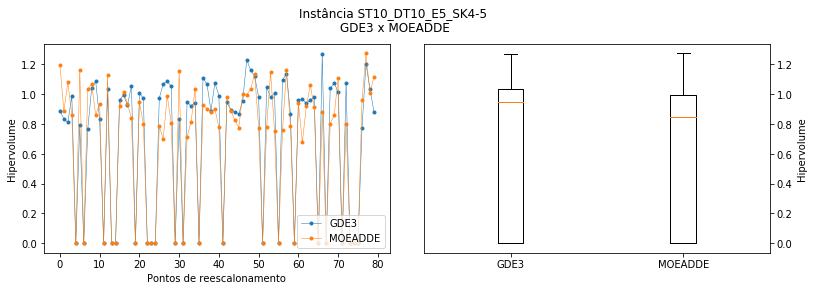

In [5]:
inst = "ST10_DT10_E5_SK4-5"
algorithms = ["GDE3", "MOEADDE", "GDE3Dynamic", "MOEADDEDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]

# display(plot_hv(hv_event, inst, algorithms))
# display(boxplot_hv(hv_event, inst, algorithms))
display(combined_plot_hv(hv_event, inst, algorithms))

In [6]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


ValueError: Less than 3 levels.  Friedman test not appropriate.

In [7]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,GDE3,MOEADDE
GDE3,-1.00E+00,1.50E-01
MOEADDE,1.50E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x7f1b441f1c88>,
 <matplotlib.colorbar.ColorbarBase at 0x7f1b4211cfd0>)

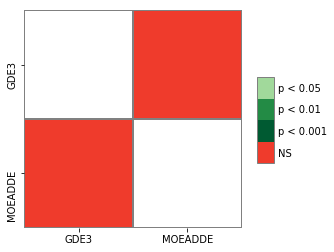

In [8]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_E15_SK4-5

None

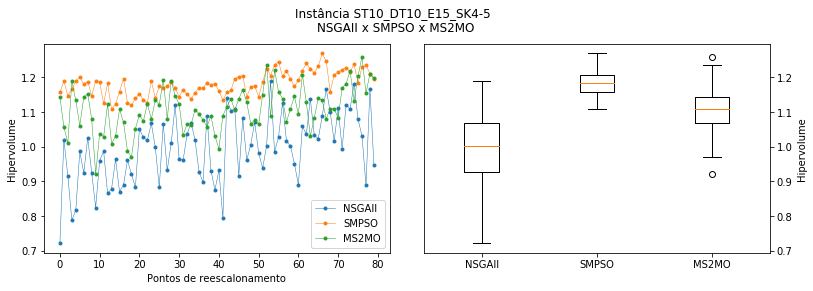

In [9]:
inst = "ST10_DT10_E15_SK4-5"
algorithms = ["NSGAII", "SMPSO", "MS2MO"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]

# display(plot_hv(hv_event, inst, algorithms))
# display(boxplot_hv(hv_event, inst, algorithms))
display(combined_plot_hv(hv_event, inst, algorithms))

In [10]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=127.825, p=1.750467E-28
Distribuições diferentes (rejeitar H0)


In [11]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,MS2MO,NSGAII,SMPSO
MS2MO,-1.00E+00,1.70E-16,2.94E-18
NSGAII,1.70E-16,-1.00E+00,2.12E-47
SMPSO,2.94E-18,2.12E-47,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x1100c7b00>,
 <matplotlib.colorbar.ColorbarBase at 0x110210198>)

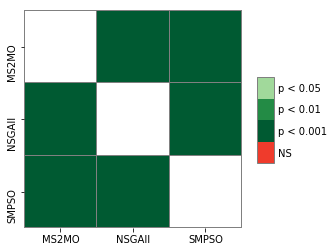

In [12]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_E5_SK4-5

None

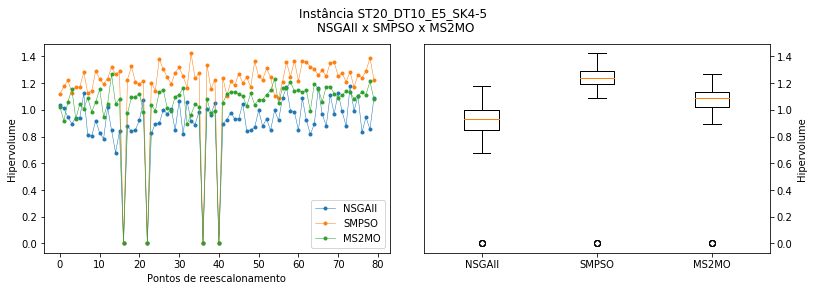

In [13]:
inst = "ST20_DT10_E5_SK4-5"
algorithms = ["NSGAII", "SMPSO", "MS2MO"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]

# display(plot_hv(hv_event, inst, algorithms))
# display(boxplot_hv(hv_event, inst, algorithms))
display(combined_plot_hv(hv_event, inst, algorithms))

In [14]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=122.289, p=2.787265E-27
Distribuições diferentes (rejeitar H0)


In [15]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,MS2MO,NSGAII,SMPSO
MS2MO,-1.00E+00,7.92E-13,1.23E-20
NSGAII,7.92E-13,-1.00E+00,1.17E-45
SMPSO,1.23E-20,1.17E-45,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x110374278>,
 <matplotlib.colorbar.ColorbarBase at 0x1104c8048>)

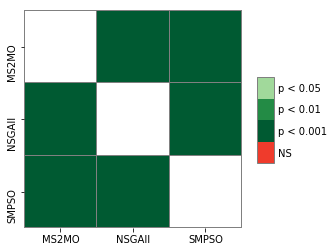

In [16]:
sp.sign_plot(pc, **heatmap_args)

## Comparação entre os algoritmos COM o uso de estratégias dinâmicas

### Instância ST10_DT10_E5_SK4-5

None

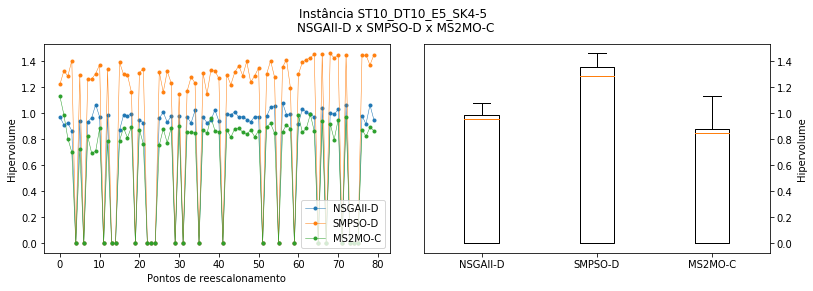

In [17]:
inst = "ST10_DT10_E5_SK4-5"
algorithms = ["NSGAII-D", "SMPSO-D", "MS2MO-C"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]

# display(plot_hv(hv_event, inst, algorithms))
# display(boxplot_hv(hv_event, inst, algorithms))
display(combined_plot_hv(hv_event, inst, algorithms))

In [18]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=108.552, p=2.680974E-24
Distribuições diferentes (rejeitar H0)


In [19]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,MS2MO-C,NSGAII-D,SMPSO-D
MS2MO-C,-1.00E+00,3.34E-04,3.75E-15
NSGAII-D,3.34E-04,-1.00E+00,3.16E-06
SMPSO-D,3.75E-15,3.16E-06,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x1106002b0>,
 <matplotlib.colorbar.ColorbarBase at 0x110774e10>)

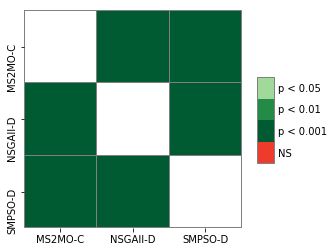

In [20]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_E15_SK4-5

None

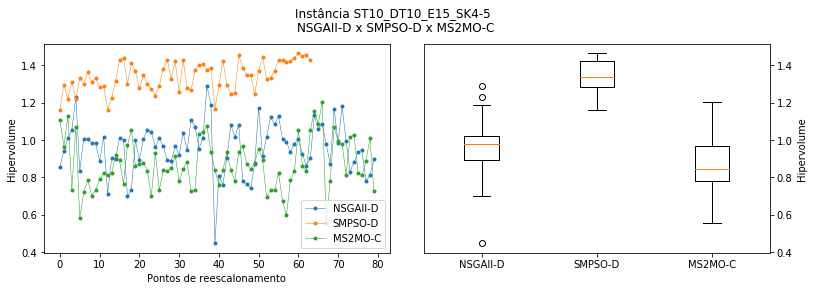

In [21]:
inst = "ST10_DT10_E15_SK4-5"
algorithms = ["NSGAII-D", "SMPSO-D", "MS2MO-C"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]

# display(plot_hv(hv_event, inst, algorithms))
# display(boxplot_hv(hv_event, inst, algorithms))
display(combined_plot_hv(hv_event, inst, algorithms))

In [22]:
# stat, p = friedmanchisquare(*datasets)
# print('Statistics=%.3f, p=%6E' % (stat, p))
# if p > alpha:
#     print('Mesmas distribuições (falhou em rejeitar H0)')
# else:
#     print('Distribuições diferentes (rejeitar H0)')


In [23]:
# df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
# df = df.melt(var_name="algorithm", value_name="hypervolume")
# pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
# pc

In [24]:
# sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_E5_SK4-5

None

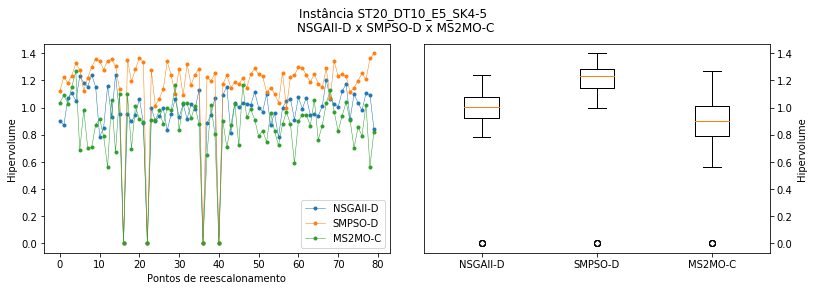

In [25]:
inst = "ST20_DT10_E5_SK4-5"
algorithms = ["NSGAII-D", "SMPSO-D", "MS2MO-C"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]

# display(plot_hv(hv_event, inst, algorithms))
# display(boxplot_hv(hv_event, inst, algorithms))
display(combined_plot_hv(hv_event, inst, algorithms))

In [26]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=107.474, p=4.596063E-24
Distribuições diferentes (rejeitar H0)


In [27]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,MS2MO-C,NSGAII-D,SMPSO-D
MS2MO-C,-1.00E+00,2.00E-05,2.04E-34
NSGAII-D,2.00E-05,-1.00E+00,3.22E-20
SMPSO-D,2.04E-34,3.22E-20,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x110a90358>,
 <matplotlib.colorbar.ColorbarBase at 0x11088e748>)

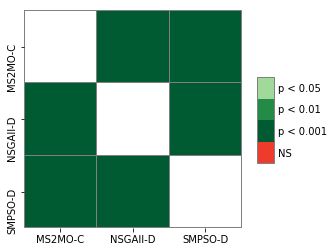

In [28]:
sp.sign_plot(pc, **heatmap_args)

## Comparação da influência das estratégias dinâmicas em cada algoritmo

### Instância ST10_DT10_E5_SK4-5

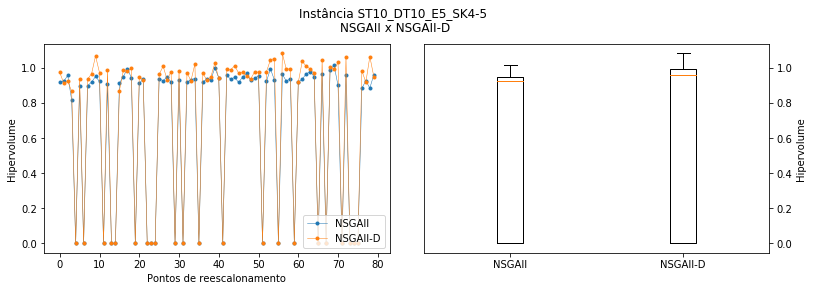

In [29]:
inst = "ST10_DT10_E5_SK4-5"
algorithms = ["NSGAII", "NSGAII-D"]
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [30]:
stat, p = wilcoxon(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=148.000, p=4.308626E-08
Distribuições diferentes (rejeitar H0)


In [31]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,NSGAII,NSGAII-D
NSGAII,-1.00E+00,1.06E-03
NSGAII-D,1.06E-03,-1.00E+00


#### SMPSO x SMPSO Dinâmico

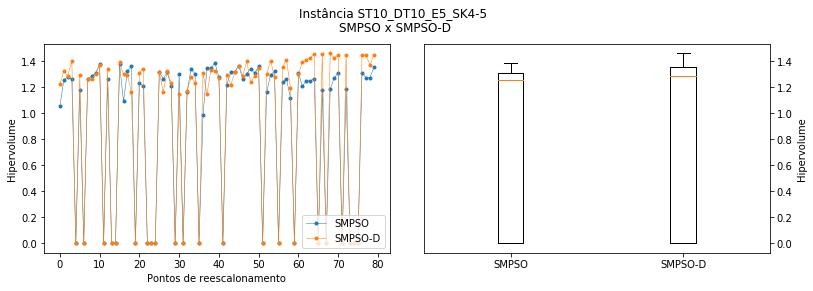

In [32]:
inst = "ST10_DT10_E5_SK4-5"
algorithms = ["SMPSO", "SMPSO-D"]
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [33]:
stat, p = wilcoxon(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=454.000, p=1.880061E-03
Distribuições diferentes (rejeitar H0)


In [34]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,SMPSO,SMPSO-D
SMPSO,-1.00E+00,4.66E-02
SMPSO-D,4.66E-02,-1.00E+00


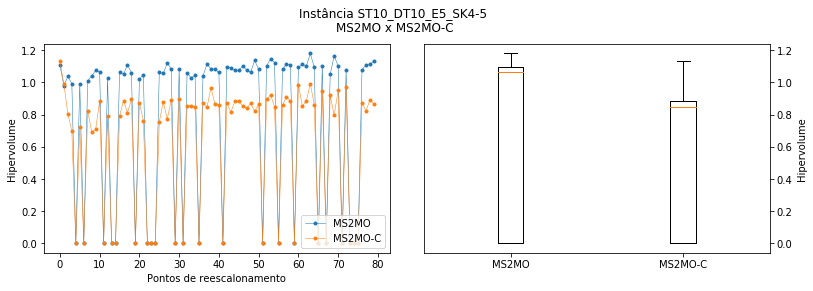

In [35]:
inst = "ST10_DT10_E5_SK4-5"
algorithms = ["MS2MO", "MS2MO-C"]
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [36]:
stat, p = wilcoxon(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=3.000, p=4.101836E-11
Distribuições diferentes (rejeitar H0)


In [37]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,MS2MO,MS2MO-C
MS2MO,-1.00E+00,3.93E-09
MS2MO-C,3.93E-09,-1.00E+00


### Instância ST10_DT10_E15_SK4-5

#### NSGA-II x NSGA-II Dinâmico

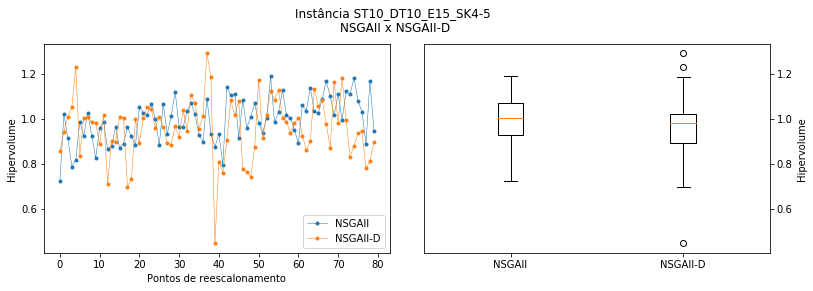

In [38]:
inst = "ST10_DT10_E15_SK4-5"
algorithms = ["NSGAII", "NSGAII-D"]
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [39]:
stat, p = wilcoxon(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=1210.000, p=4.924345E-02
Distribuições diferentes (rejeitar H0)


#### SMPSO x SMPSO Dinâmico

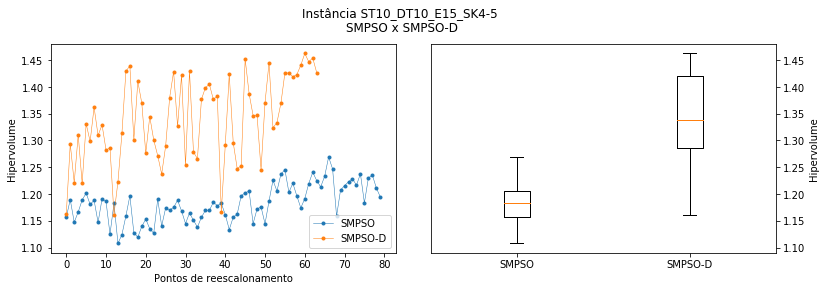

In [40]:
inst = "ST10_DT10_E15_SK4-5"
algorithms = ["SMPSO", "SMPSO-D"]
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [41]:
# stat, p = wilcoxon(*datasets)
# print('Statistics=%.3f, p=%6E' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Mesmas distribuições (falhou em rejeitar H0)')
# else:
#     print('Distribuições diferentes (rejeitar H0)')


#### MS2MO x MS2MO Dinâmico

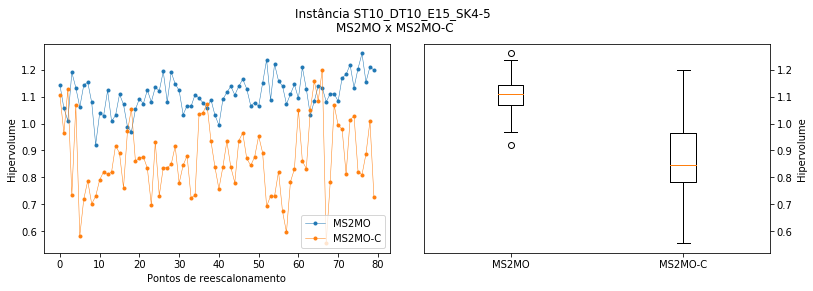

In [42]:
inst = "ST10_DT10_E15_SK4-5"
algorithms = ["MS2MO", "MS2MO-C"]
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [43]:
stat, p = wilcoxon(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=59.000, p=7.046339E-14
Distribuições diferentes (rejeitar H0)


### Instância ST20_DT10_E5_SK4-5

#### NSGA-II x NSGA-II Dinâmico

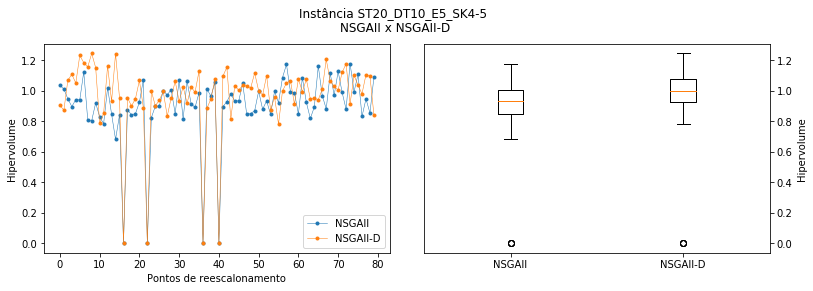

In [44]:
inst = "ST20_DT10_E5_SK4-5"
algorithms = ["NSGAII", "NSGAII-D"]
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [45]:
stat, p = wilcoxon(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=836.000, p=1.169566E-03
Distribuições diferentes (rejeitar H0)


#### SMPSO x SMPSO Dinâmico

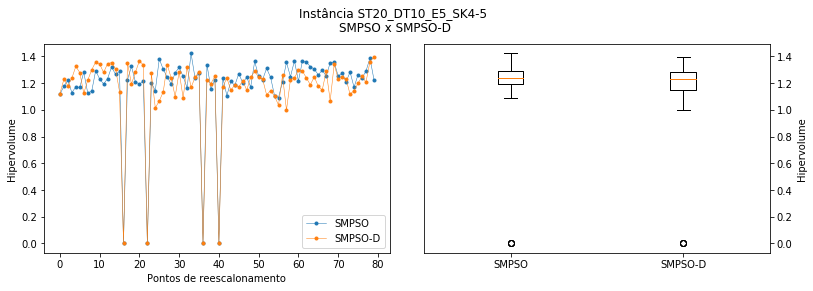

In [46]:
inst = "ST20_DT10_E5_SK4-5"
algorithms = ["SMPSO", "SMPSO-D"]
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [47]:
stat, p = wilcoxon(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=1206.000, p=1.833274E-01
Mesmas distribuições (falhou em rejeitar H0)


#### MS2MO x MS2MO Dinâmico

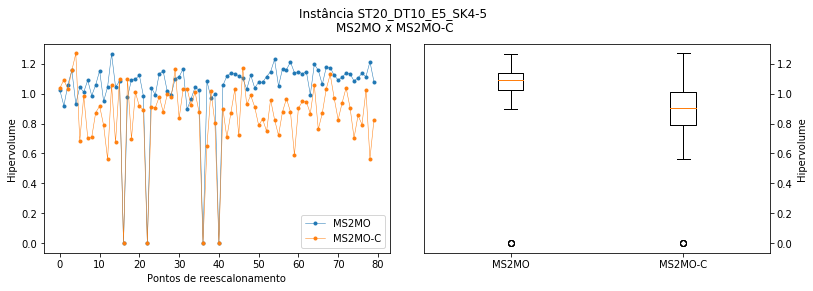

In [48]:
inst = "ST20_DT10_E5_SK4-5"
algorithms = ["MS2MO", "MS2MO-C"]
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [49]:
stat, p = wilcoxon(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=186.000, p=3.804983E-11
Distribuições diferentes (rejeitar H0)


## Comparações pareadas entre todos os algortimos

In [50]:
pc = {}
algorithms = ["MS2MO", "MS2MO-C", "MS2MO-H", "MS2MO-P", "NSGAII", "NSGAII-D", "SMPSO", "SMPSO-D"]

In [51]:
inst = "ST10_DT10_E5_SK4-5"
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc[inst] = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")       

In [52]:
inst = "ST10_DT10_E15_SK4-5" 
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc[inst] = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")   

In [53]:
inst = "ST20_DT10_E5_SK4-5"
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc[inst] = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")   

### Instância ST10_DT10_E5_SK4-5

,MS2MO,MS2MO-C,MS2MO-H,MS2MO-P,NSGAII,NSGAII-D,SMPSO,SMPSO-D
MS2MO,-1.00E+00,4.90E-09,1.76E-07,7.53E-08,9.78E-05,1.23E-02,2.21E-02,3.28E-03
MS2MO-C,4.90E-09,-1.00E+00,5.16E-01,6.24E-01,4.46E-02,6.59E-04,1.10E-15,6.62E-18
MS2MO-H,1.76E-07,5.16E-01,-1.00E+00,8.73E-01,1.74E-01,5.73E-03,1.27E-13,1.04E-15
MS2MO-P,7.53E-08,6.24E-01,8.73E-01,-1.00E+00,1.29E-01,3.48E-03,4.06E-14,3.08E-16
NSGAII,9.78E-05,4.46E-02,1.74E-01,1.29E-01,-1.00E+00,1.59E-01,9.32E-10,1.51E-11
NSGAII-D,1.23E-02,6.59E-04,5.73E-03,3.48E-03,1.59E-01,-1.00E+00,1.95E-06,6.78E-08
SMPSO,2.21E-02,1.10E-15,1.27E-13,4.06E-14,9.32E-10,1.95E-06,-1.00E+00,5.11E-01
SMPSO-D,3.28E-03,6.62E-18,1.04E-15,3.08E-16,1.51E-11,6.78E-08,5.11E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x111001e48>,
 <matplotlib.colorbar.ColorbarBase at 0x111192f28>)

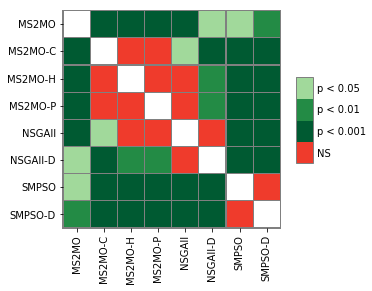

In [54]:
display(pc["ST10_DT10_E5_SK4-5"])
sp.sign_plot(pc["ST10_DT10_E5_SK4-5"], **heatmap_args)

### Instância ST10_DT10_E15_SK4-5

,MS2MO,MS2MO-C,MS2MO-H,MS2MO-P,NSGAII,NSGAII-D,SMPSO,SMPSO-D
MS2MO,-1.00E+00,1.77E-40,2.23E-39,1.69E-53,1.04E-12,7.46E-19,3.16E-07,5.41E-21
MS2MO-C,1.77E-40,-1.00E+00,8.15E-01,8.23E-03,4.87E-12,3.25E-07,1.37E-66,7.73E-87
MS2MO-H,2.23E-39,8.15E-01,-1.00E+00,4.05E-03,2.26E-11,1.05E-06,2.38E-65,1.23E-85
MS2MO-P,1.69E-53,8.23E-03,4.05E-03,-1.00E+00,8.13E-21,2.31E-14,7.91E-81,1.71E-100
NSGAII,1.04E-12,4.87E-12,2.26E-11,8.13E-21,-1.00E+00,6.04E-02,6.07E-32,1.24E-51
NSGAII-D,7.46E-19,3.25E-07,1.05E-06,2.31E-14,6.04E-02,-1.00E+00,1.67E-40,9.76E-61
SMPSO,3.16E-07,1.37E-66,2.38E-65,7.91E-81,6.07E-32,1.67E-40,-1.00E+00,1.41E-06
SMPSO-D,5.41E-21,7.73E-87,1.23E-85,1.71E-100,1.24E-51,9.76E-61,1.41E-06,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x1111a41d0>,
 <matplotlib.colorbar.ColorbarBase at 0x110e26dd8>)

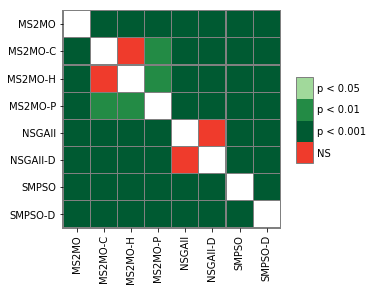

In [55]:
display(pc["ST10_DT10_E15_SK4-5"])
sp.sign_plot(pc["ST10_DT10_E15_SK4-5"], **heatmap_args)

### Instância ST20_DT10_E5_SK4-5

,MS2MO,MS2MO-C,MS2MO-H,MS2MO-P,NSGAII,NSGAII-D,SMPSO,SMPSO-D
MS2MO,-1.00E+00,1.82E-16,1.72E-31,1.25E-17,3.66E-12,1.76E-04,1.88E-12,1.01E-09
MS2MO-C,1.82E-16,-1.00E+00,1.17E-04,7.33E-01,1.70E-01,3.37E-06,6.78E-47,4.07E-42
MS2MO-H,1.72E-31,1.17E-04,-1.00E+00,4.39E-04,2.07E-07,8.25E-17,8.61E-67,1.34E-61
MS2MO-P,1.25E-17,7.33E-01,4.39E-04,-1.00E+00,8.64E-02,6.37E-07,1.39E-48,9.31E-44
NSGAII,3.66E-12,1.70E-01,2.07E-07,8.64E-02,-1.00E+00,9.73E-04,2.86E-40,1.04E-35
NSGAII-D,1.76E-04,3.37E-06,8.25E-17,6.37E-07,9.73E-04,-1.00E+00,1.03E-25,7.37E-22
SMPSO,1.88E-12,6.78E-47,8.61E-67,1.39E-48,2.86E-40,1.03E-25,-1.00E+00,3.25E-01
SMPSO-D,1.01E-09,4.07E-42,1.34E-61,9.31E-44,1.04E-35,7.37E-22,3.25E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x110e3f9e8>,
 <matplotlib.colorbar.ColorbarBase at 0x110023eb8>)

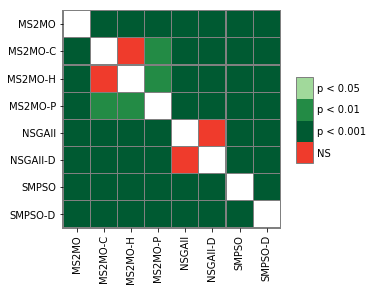

In [56]:
display(pc["ST20_DT10_E5_SK4-5"])
sp.sign_plot(pc["ST10_DT10_E15_SK4-5"], **heatmap_args)

### QP3: Influência de cada estratégia heurística dinâmica

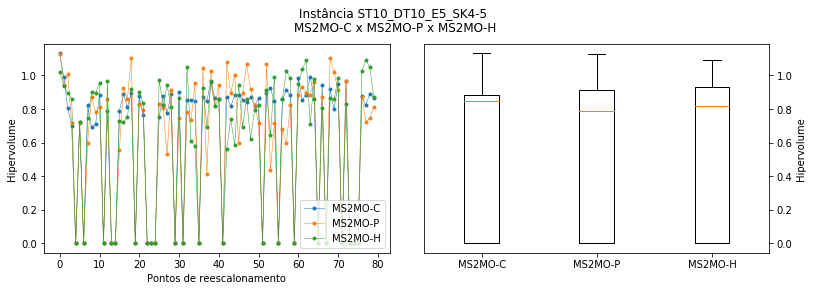

In [57]:
algorithms = ["MS2MO-C", "MS2MO-P", "MS2MO-H"]
inst = "ST10_DT10_E5_SK4-5"
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [58]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=0.724, p=6.962344E-01
Mesmas distribuições (falhou em rejeitar H0)


In [59]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,MS2MO-C,MS2MO-H,MS2MO-P
MS2MO-C,-1.00E+00,7.90E-01,9.46E-01
MS2MO-H,7.90E-01,-1.00E+00,7.38E-01
MS2MO-P,9.46E-01,7.38E-01,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x1104fd240>,
 <matplotlib.colorbar.ColorbarBase at 0x106828780>)

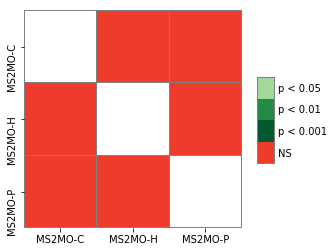

In [60]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

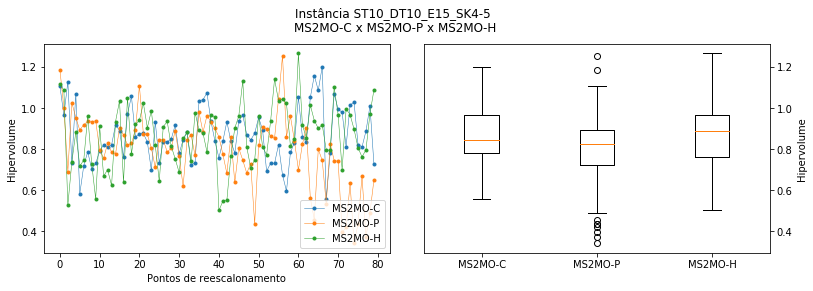

In [61]:
algorithms = ["MS2MO-C", "MS2MO-P", "MS2MO-H"]
inst = "ST10_DT10_E15_SK4-5"
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [62]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=3.675, p=1.592150E-01
Mesmas distribuições (falhou em rejeitar H0)


In [63]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,MS2MO-C,MS2MO-H,MS2MO-P
MS2MO-C,-1.00E+00,9.19E-01,1.57E-02
MS2MO-H,9.19E-01,-1.00E+00,1.19E-02
MS2MO-P,1.57E-02,1.19E-02,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x110614cf8>,
 <matplotlib.colorbar.ColorbarBase at 0x1075c19b0>)

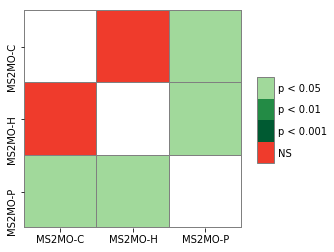

In [64]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

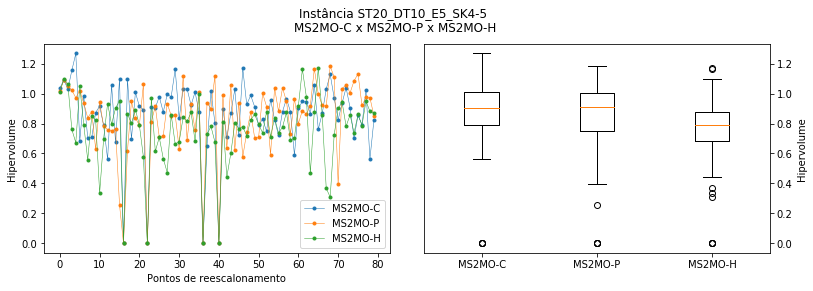

In [65]:
algorithms = ["MS2MO-C", "MS2MO-P", "MS2MO-H"]
inst = "ST20_DT10_E5_SK4-5"
datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
combined_plot_hv(hv_event, inst, algorithms)

In [66]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=11.368, p=3.399216E-03
Distribuições diferentes (rejeitar H0)


In [67]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

,MS2MO-C,MS2MO-H,MS2MO-P
MS2MO-C,-1.00E+00,1.06E-04,6.97E-01
MS2MO-H,1.06E-04,-1.00E+00,4.58E-04
MS2MO-P,6.97E-01,4.58E-04,-1.00E+00


(<matplotlib.axes._subplots.AxesSubplot at 0x110903cc0>,
 <matplotlib.colorbar.ColorbarBase at 0x1111e7668>)

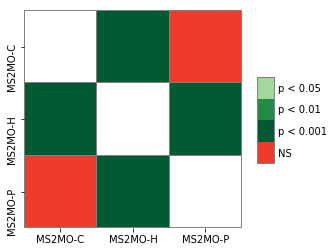

In [68]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)